In [50]:
import numpy as np

In [51]:
class linear_regression():
  def __init__(self,learning_rate,no_of_iteration):
    self.learning_rate=learning_rate
    self.no_of_iteration=no_of_iteration
  def fit(self,x,y):
    self.m,self.n=x.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y
    for i in range(self.no_of_iteration):
      self.update_weights()
  def update_weights(self):
    y_prediciton=self.predict(self.x)
    dw=-(2*(self.x.T).dot(self.y - y_prediciton)/self.m)
    db=-(2*np.sum(self.y-y_prediciton)/self.m)
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,x):
    return x.dot(self.w)+self.b


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [53]:
salary_data=pd.read_csv('/content/salary_data.csv')

In [54]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [55]:
salary_data.shape


(30, 2)

In [56]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [57]:
x=salary_data.iloc[:,:-1]
y=salary_data.iloc[:,1]
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [58]:
print(y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
model=linear_regression(learning_rate=0.01,no_of_iteration=100)
model.fit(x_train,y_train)

In [61]:
print('weight= ',model.w[0])
print('bias= ',model.b)

weight=  11747.018874666497
bias=  9108.123681261814


In [62]:
test_pred=model.predict(x_test)
print(test_pred)

1     24379.248218
0     22029.844443
14    61969.708617
9     52572.093518
21    92511.957691
19    79590.236929
dtype: float64


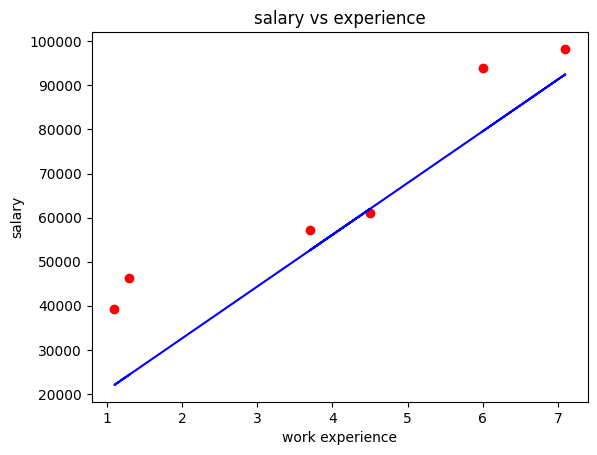

In [63]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_pred,color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary vs experience')
plt.show()